# EDA on Haberman Survival Dataset


## Haberman's Suvival dataset :-

### Reference :

https://www.kaggle.com/gilsousa/habermans-survival-data-set

### Information About Dataset  :
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Objective :

To predict Whether a patient will survive 5 years or more after the operation based on age , year of operation and the number of positive axillary nodes.

In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
column = ['Patient_age', 'Year_of_operation', 'positive_axillary_nodes', 'Survival_status']
data = pd.read_csv(r"C:\Users\asus\Desktop\haberman.csv",names=column)

In [32]:
data.head()

,Patient_age,Year_of_operation,positive_axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [33]:
print("The number of data points and features respectievely:" , data.shape)
print("\n")
print("Data points per class:") 
data['Survival_status'].value_counts()

The number of data points and features respectievely: (306, 4)


Data points per class:


1    225
2     81
Name: Survival_status, dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Patient_age              306 non-null    int64
 1   Year_of_operation        306 non-null    int64
 2   positive_axillary_nodes  306 non-null    int64
 3   Survival_status          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [35]:
data_survived = data.loc[data["Survival_status"] == 1]
data_died = data.loc[data["Survival_status"] == 2]

print("Basic statistics about patients who survived 5 years or longer after operation")
data_survived.describe()

Basic statistics about patients who survived 5 years or longer after operation


,Patient_age,Year_of_operation,positive_axillary_nodes,Survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [36]:
print("Basic statistics about patients who died within 5 years of operation")
data_died.describe()

Basic statistics about patients who died within 5 years of operation


,Patient_age,Year_of_operation,positive_axillary_nodes,Survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


## Univariate Analysis Based on Diffrent Features

### 2-D Scatter Plot

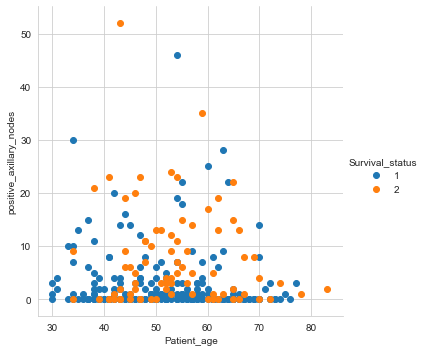

In [38]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='Survival_status',height=5).map(plt.scatter,'Patient_age',
                    'positive_axillary_nodes').add_legend()
plt.show()

## Pstient_age 

### Histogram with PDF

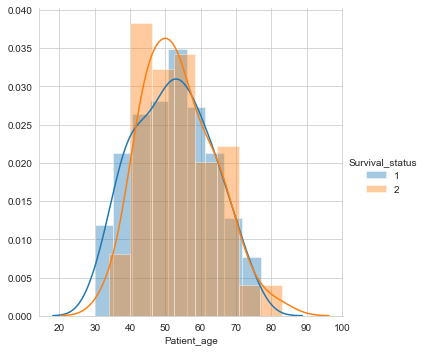

In [39]:
sns.set_style("whitegrid")
sns.FacetGrid(data , hue = "Survival_status" ,height= 5).map(sns.distplot , "Patient_age").add_legend()
plt.show()

## PDF and CDF Plot :

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


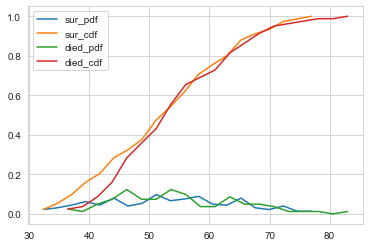

In [41]:
counts, bin_edges = np.histogram(data_survived['Patient_age'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(data_died['Patient_age'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] ,cdf)
plt.legend(['sur_pdf', 'sur_cdf','died_pdf', 'died_cdf'])

plt.show()

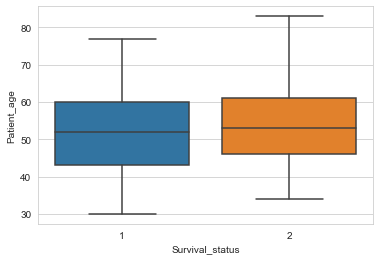

In [42]:
sns.boxplot(x = 'Survival_status',y= 'Patient_age',data = data)
plt.show()

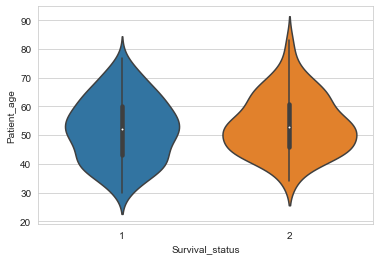

In [43]:
sns.violinplot(x = 'Survival_status',y= 'Patient_age',data=data)
plt.show()

## year_of_operation

### Histogram with PDF

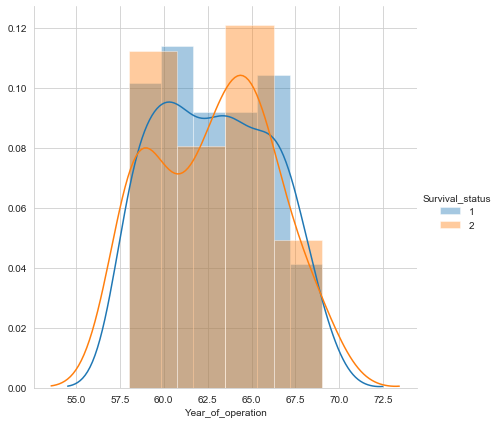

In [44]:
sns.set_style('whitegrid')
sns.FacetGrid(data , hue = "Survival_status" ,height=6).map(sns.distplot , "Year_of_operation").add_legend()
plt.show()

### PDF and CDF plot :

[0.10666667 0.         0.08       0.         0.         0.10666667
 0.         0.         0.10222222 0.         0.07111111 0.
 0.         0.09777778 0.         0.         0.10222222 0.
 0.         0.06666667 0.         0.09777778 0.         0.
 0.09333333 0.         0.         0.04444444 0.         0.03111111]
[58.         58.36666667 58.73333333 59.1        59.46666667 59.83333333
 60.2        60.56666667 60.93333333 61.3        61.66666667 62.03333333
 62.4        62.76666667 63.13333333 63.5        63.86666667 64.23333333
 64.6        64.96666667 65.33333333 65.7        66.06666667 66.43333333
 66.8        67.16666667 67.53333333 67.9        68.26666667 68.63333333
 69.        ]
[0.14814815 0.         0.11111111 0.         0.         0.04938272
 0.         0.         0.03703704 0.         0.08641975 0.
 0.         0.09876543 0.         0.         0.09876543 0.
 0.         0.16049383 0.         0.07407407 0.         0.
 0.04938272 0.         0.         0.03703704 0.         0.0493827

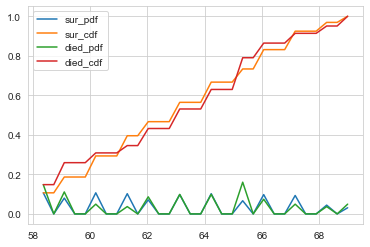

In [45]:
counts, bin_edges = np.histogram(data_survived['Year_of_operation'], bins= 30, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(data_died['Year_of_operation'], bins=30, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] ,cdf)
plt.legend(['sur_pdf', 'sur_cdf','died_pdf', 'died_cdf'])

plt.show()

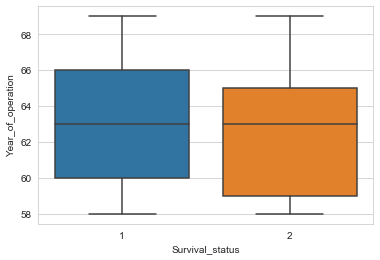

In [46]:
sns.boxplot(x='Survival_status',y='Year_of_operation', data= data)
plt.show()

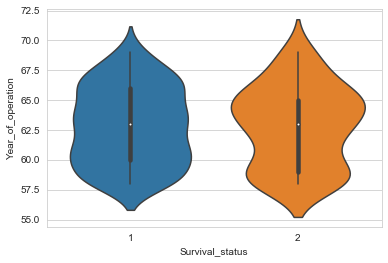

In [47]:
sns.violinplot(x="Survival_status", y="Year_of_operation", data = data)
plt.show()

## Positive_axillary_nodes 

### Histogram with PDF  :

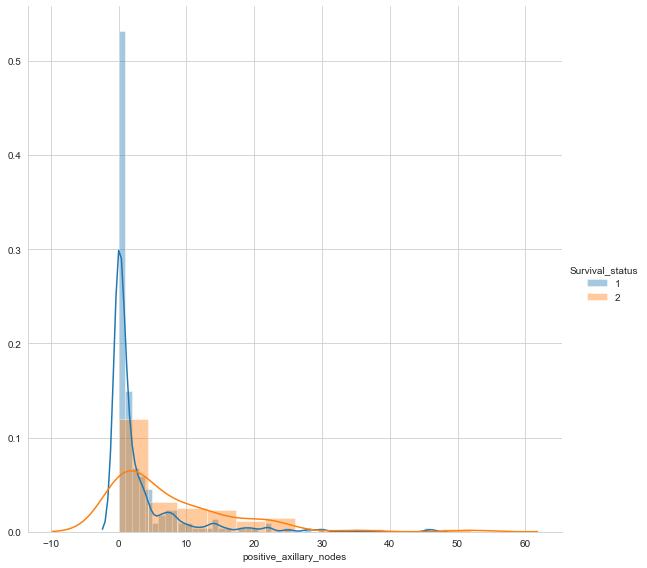

In [48]:
sns.set_style("whitegrid")
sns.FacetGrid(data , hue = "Survival_status" , height= 8).map(sns.distplot , "positive_axillary_nodes").add_legend()
plt.show()

### PDF and CDF Plot  :


[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


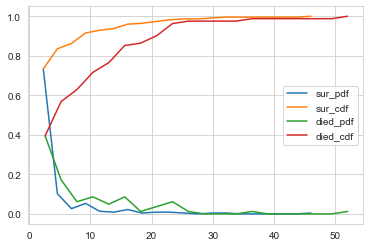

In [49]:
counts, bin_edges = np.histogram(data_survived['positive_axillary_nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(data_died['positive_axillary_nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] ,cdf)
plt.legend(['sur_pdf', 'sur_cdf','died_pdf', 'died_cdf'])

plt.show()

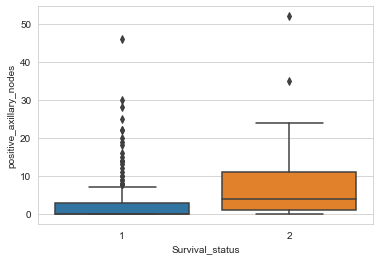

In [50]:
sns.boxplot(x='Survival_status',y='positive_axillary_nodes', data= data)
plt.show()

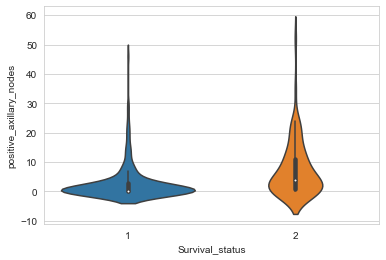

In [51]:
sns.violinplot(x="Survival_status", y="positive_axillary_nodes", data = data)
plt.show()

## Bivariate Analysis :

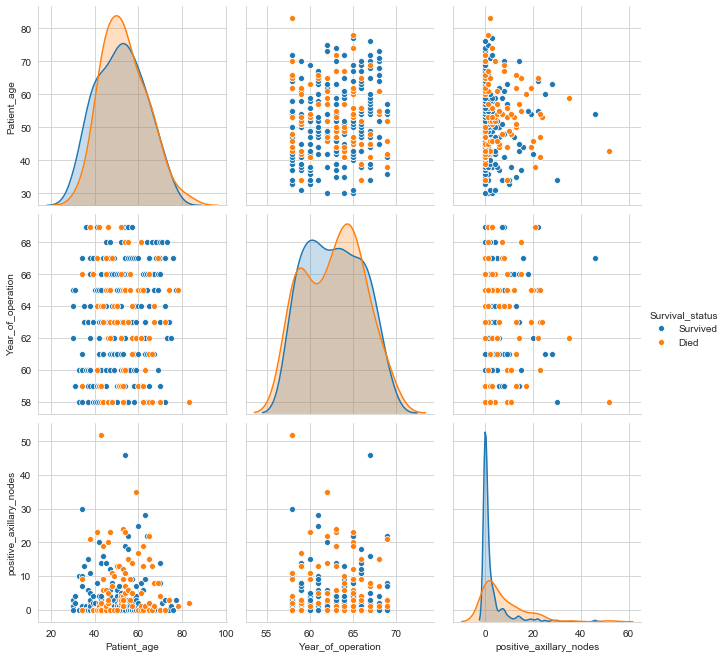

In [52]:
plt.close()
data["Survival_status"] = data["Survival_status"].apply(lambda x: "Survived" if x == 1 else "Died")
sns.set_style("whitegrid")
sns.pairplot(data , hue="Survival_status",height=3)
plt.show()

## Multivariate Analysis :

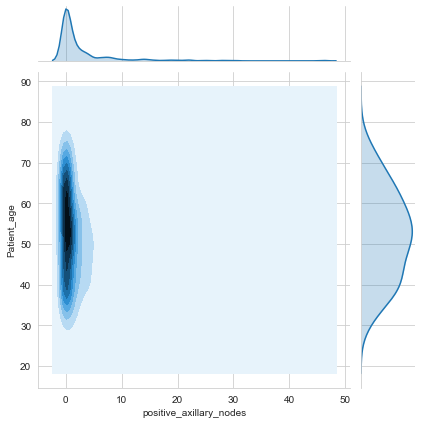

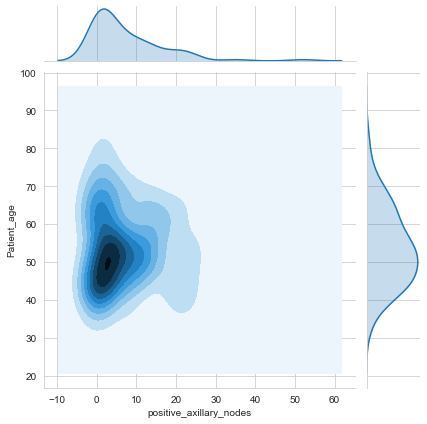

In [53]:
sns.jointplot(x="positive_axillary_nodes", y="Patient_age", data = data_survived , kind="kde")
plt.show()

sns.jointplot(x="positive_axillary_nodes", y="Patient_age", data = data_died , kind="kde")
plt.show()

* no dependency between age and number of positive axillary nodes